In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import interp

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import unique_labels

In [3]:
raw = pd.read_csv('X_raw.csv')

In [4]:
raw.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,year,day,month,duration,campaign,pdays,previous,poutcome
0,0,58,management,married,tertiary,0,2143,1,0,2008,5,5,261,1,-1,0,other
1,1,44,technician,single,secondary,0,29,1,0,2008,5,5,151,1,-1,0,other
2,2,33,entrepreneur,married,secondary,0,2,1,1,2008,5,5,76,1,-1,0,other
3,3,47,blue-collar,married,primary,0,1506,1,0,2008,5,5,92,1,-1,0,other
4,4,33,unemployed,single,primary,0,1,0,0,2008,5,5,198,1,-1,0,other


In [131]:
df = pd.read_csv('X_before_PCA.csv', index_col=[0])

In [133]:
df.head()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,job_services,job_student,marital_married,marital_single,education_secondary,education_tertiary,poutcome_other,poutcome_success
0,58,2143,1,0,5,261,1,-1,0,0,1,0,0,0,1,0,0,1,1,0
1,44,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,1,1,0,1,0
2,33,2,1,1,5,76,1,-1,0,0,0,0,0,0,1,0,1,0,1,0
3,47,1506,1,0,5,92,1,-1,0,1,0,0,0,0,1,0,0,0,1,0
4,33,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,1,0


In [134]:
df.describe()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,job_services,job_student,marital_married,marital_single,education_secondary,education_tertiary,poutcome_other,poutcome_success
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.209197,0.050076,0.09188,0.020747,0.601933,0.282896,0.513194,0.294198,0.858176,0.033421
std,10.618762,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.406740,0.218105,0.28886,0.142538,0.489505,0.450411,0.499831,0.455687,0.348873,0.179735
min,18.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,95.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
y = pd.read_csv('y.csv', index_col=[0])

In [136]:
X = np.array(df)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)

/Users/6jncnk4f/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
y_pred = clf.predict(X_test)

In [139]:
clf.score(X_test, y_test)

0.8885251703087675

In [140]:
confusion_matrix(y_test, y_pred)

array([[9756,  194],
       [1066,  287]])

In [141]:
y = y.ravel()

In [142]:
logit_clf = LogisticRegression(random_state=0)

In [143]:
def plot(clf):

    cv = StratifiedKFold(n_splits=6)
    classifier = clf

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        
        # conpute auc
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='darkorange',
             label='Baseline', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='dodgerblue',
             label=r'Mean Model ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return mean_fpr, mean_tpr

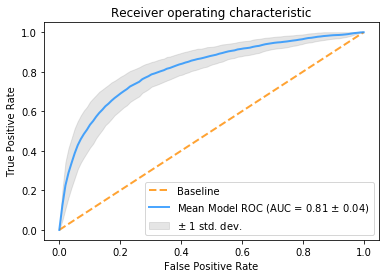

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 array([0.  , 0.12, 0.23, 0.29, 0.34, 0.39, 0.43, 0.46, 0.49, 0.51, 0.53,
        0.55, 0.57, 0.59, 0.61, 0.63, 0.64, 0.65, 0.67, 0.68, 0.69, 0.7 ,
        0.71, 0.73, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.79, 0.8 ,
        0.8 , 0.81, 0.82, 0.82, 0.83, 0.83, 0.84, 0.84, 0.85, 0.85, 0.86,
        0.86, 0.86, 0.

In [144]:
fpr1, tpr1 = plot(logit_clf)

/Users/6jncnk4f/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[9756  194]
 [1066  287]]
Normalized confusion matrix
[[0.98 0.02]
 [0.79 0.21]]


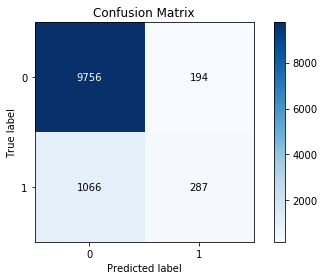

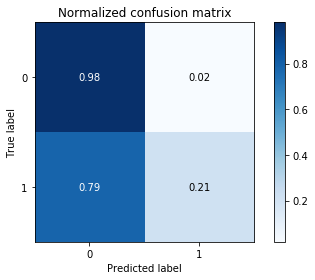

In [145]:
classifier = LogisticRegression(random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = ['0','1'], title='Confusion Matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True,title='Normalized confusion matrix')

plt.show()

### RF

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [153]:
# change params here
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=80,max_features=3,\
                                min_samples_leaf=5,min_samples_split=8, oob_score= True)

In [ ]:
# fit and plot

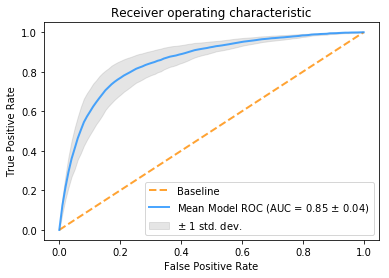

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 array([0.  , 0.12, 0.21, 0.29, 0.36, 0.41, 0.46, 0.5 , 0.55, 0.57, 0.6 ,
        0.62, 0.65, 0.67, 0.69, 0.71, 0.72, 0.74, 0.75, 0.76, 0.77, 0.78,
        0.79, 0.8 , 0.81, 0.82, 0.82, 0.83, 0.83, 0.84, 0.84, 0.85, 0.86,
        0.86, 0.87, 0.87, 0.88, 0.88, 0.88, 0.89, 0.89, 0.9 , 0.9 , 0.9 ,
        0.91, 0.91, 0.

In [154]:
fpr2, tpr2 = plot(rf_clf)

Confusion matrix, without normalization
[[9757  193]
 [ 981  372]]
Normalized confusion matrix
[[0.98 0.02]
 [0.73 0.27]]


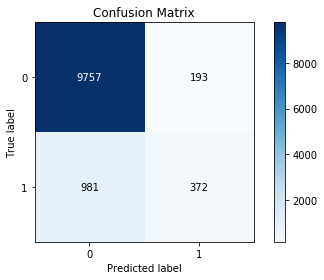

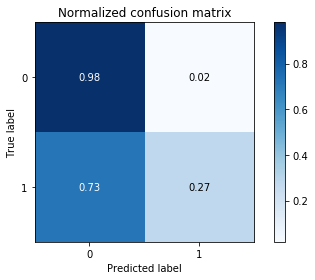

In [155]:
np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, y_pred, classes = ['0','1'], title='Confusion Matrix')
plot_confusion_matrix(y_test, y_pred, classes=['0','1'], normalize=True,title='Normalized confusion matrix')

plt.show()

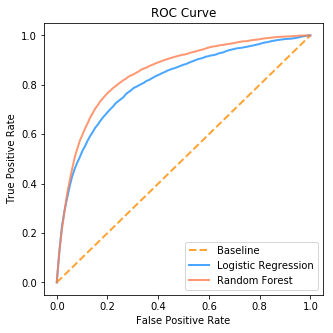

In [179]:
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='darkorange',
             label='Baseline', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(fpr1, tpr1, color='dodgerblue',
         label='Logistic Regression',
         lw=2, alpha=.8)

plt.plot(fpr2, tpr2, color='coral',
         label='Random Forest',
         lw=2, alpha=.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
    

In [176]:
COLOR = 'black'